In [4]:
# !python -m pip install openpyxl
!pip install kneed
!pip install matplotlib
!pip install seaborn
# !conda update -n base -c defaults conda -y
# !conda install openpyxl -y
# !pip install openpyxl  --upgrade
!pip install pandas --upgrade
!pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [1]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Specify the path to your CSV file
excel_file_path = "UCS-Satellite-Database-1-1-2023.xlsx"
# "/Users/reddy/Downloads/UCS-Satellite-Database-1-1-2023.xlsx"

# Use pandas to read the CSV file into a DataFrame
df_org = pd.read_excel(excel_file_path, engine='openpyxl')

# Display the first few rows of the DataFrame
df_org.head()

,"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
0,1HOPSAT-TD (1st-generation High Optical Perfor...,1HOPSAT-TD,NR,USA,Hera Systems,Commercial,Earth Observation,Infrared Imaging,LEO,Non-Polar Inclined,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aalto-1,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,NaN,LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAt-4,AAt-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"ABS-2 (Koreasat-8, ST-3)",ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABS-2A,ABS-2A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_org.shape

(6718, 68)

In [4]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6718 entries, 0 to 6717
Data columns (total 68 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Name of Satellite, Alternate Names  6718 non-null   object 
 1   Current Official Name of Satellite  6718 non-null   object 
 2   Country/Org of UN Registry          6718 non-null   object 
 3   Country of Operator/Owner           6718 non-null   object 
 4   Operator/Owner                      6718 non-null   object 
 5   Users                               6718 non-null   object 
 6   Purpose                             6718 non-null   object 
 7   Detailed Purpose                    1167 non-null   object 
 8   Class of Orbit                      6718 non-null   object 
 9   Type of Orbit                       6077 non-null   object 
 10  Longitude of GEO (degrees)          6716 non-null   float64
 11  Perigee (km)                        6718 no

In [5]:
columns_to_drop = df_org.columns[27:]  # Column indices from 36 to 66
df = df_org.drop(columns=columns_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6718 entries, 0 to 6717
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Name of Satellite, Alternate Names  6718 non-null   object 
 1   Current Official Name of Satellite  6718 non-null   object 
 2   Country/Org of UN Registry          6718 non-null   object 
 3   Country of Operator/Owner           6718 non-null   object 
 4   Operator/Owner                      6718 non-null   object 
 5   Users                               6718 non-null   object 
 6   Purpose                             6718 non-null   object 
 7   Detailed Purpose                    1167 non-null   object 
 8   Class of Orbit                      6718 non-null   object 
 9   Type of Orbit                       6077 non-null   object 
 10  Longitude of GEO (degrees)          6716 non-null   float64
 11  Perigee (km)                        6718 no

In [6]:
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col}: \033[1m{unique_count} \033[0m")

Name of Satellite, Alternate Names: 6709 
Current Official Name of Satellite: 6698 
Country/Org of UN Registry: 70 
Country of Operator/Owner: 104 
Operator/Owner: 639 
Users: 20 
Purpose: 31 
Detailed Purpose: 52 
Class of Orbit: 5 
Type of Orbit: 8 
Longitude of GEO (degrees): 445 
Perigee (km): 783 
Apogee (km): 777 
Eccentricity: 1824 
Inclination (degrees): 449 
Period (minutes): 579 
Launch Mass (kg.): 585 
Dry Mass (kg.): 171 
Power (watts): 152 
Date of Launch: 1187 
Expected Lifetime (yrs.): 28 
Contractor: 560 
Country of Contractor: 103 
Launch Site: 39 
Launch Vehicle: 164 
COSPAR Number: 6707 
NORAD Number: 6703 


In [7]:
missing_values_count_per_column = {}

for col in df.columns:
    missing_values_count = df[col].isna().sum()
    missing_values_count_per_column[col] = missing_values_count

# Display the number of missing values for each column
for col, count in missing_values_count_per_column.items():
    print(f"{col}: \033[1m{count} \033[0m")

Name of Satellite, Alternate Names: 0 
Current Official Name of Satellite: 0 
Country/Org of UN Registry: 0 
Country of Operator/Owner: 0 
Operator/Owner: 0 
Users: 0 
Purpose: 0 
Detailed Purpose: 5551 
Class of Orbit: 0 
Type of Orbit: 641 
Longitude of GEO (degrees): 2 
Perigee (km): 0 
Apogee (km): 0 
Eccentricity: 0 
Inclination (degrees): 0 
Period (minutes): 44 
Launch Mass (kg.): 243 
Dry Mass (kg.): 6274 
Power (watts): 6137 
Date of Launch: 0 
Expected Lifetime (yrs.): 1914 
Contractor: 0 
Country of Contractor: 0 
Launch Site: 0 
Launch Vehicle: 0 
COSPAR Number: 0 
NORAD Number: 0 


In [8]:


duplicates = df.duplicated()

# Counting the number of duplicate rows
num_duplicates_rows = duplicates.sum()
print("Number of duplicate rows:", num_duplicates_rows)



Number of duplicate rows: 0


In [9]:
import pandas as pd

# Assuming 'df' is your DataFrame
threshold = 1000  # Set your threshold for missing values

# Calculate the number of missing values in each column
missing_values = df.isnull().sum()

# Filter columns with more than the threshold number of missing values
columns_to_drop = missing_values[missing_values > threshold].index

# Drop the selected columns
df.drop(columns=columns_to_drop, inplace=True)


In [28]:
df["Class of Orbit"] = df["Class of Orbit"].apply(lambda x: x.replace("LEO", "1"))
df["Class of Orbit"] = df["Class of Orbit"].apply(lambda x: x.replace("GEO", "2"))
df["Class of Orbit"] = df["Class of Orbit"].apply(lambda x: x.replace("Elliptical", "3"))
df["Class of Orbit"] = df["Class of Orbit"].apply(lambda x: x.replace("MEO", "4"))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6718 entries, 0 to 6717
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Name of Satellite, Alternate Names  6718 non-null   object 
 1   Current Official Name of Satellite  6718 non-null   object 
 2   Country/Org of UN Registry          6718 non-null   object 
 3   Country of Operator/Owner           6718 non-null   object 
 4   Operator/Owner                      6718 non-null   object 
 5   Users                               6718 non-null   object 
 6   Purpose                             6718 non-null   object 
 7   Class of Orbit                      6718 non-null   object 
 8   Type of Orbit                       6077 non-null   object 
 9   Longitude of GEO (degrees)          6716 non-null   float64
 10  Perigee (km)                        6718 non-null   int64  
 11  Apogee (km)                         6718 no

In [29]:


import pandas as pd

# Assuming 'df' is your DataFrame

# Identify numerical and categorical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(exclude=['number']).columns.tolist()

# Sort the columns within each group
numerical_columns.sort()
categorical_columns.sort()



categorical_columns.remove('Class of Orbit')
numerical_columns.remove('NORAD Number')
categorical_columns.append('NORAD Number')
numerical_columns.append('Class of Orbit')

# Print the sorted columns
print("Numerical Columns:")
print(numerical_columns)

print("\nCategorical Columns:")
print(categorical_columns)



Numerical Columns:
['Apogee (km)', 'Eccentricity', 'Launch Mass (kg.)', 'Longitude of GEO (degrees)', 'Perigee (km)', 'Period (minutes)', 'Class of Orbit']

Categorical Columns:
['COSPAR Number', 'Contractor', 'Country of Contractor', 'Country of Operator/Owner', 'Country/Org of UN Registry', 'Current Official Name of Satellite', 'Date of Launch', 'Inclination (degrees)', 'Launch Site', 'Launch Vehicle', 'Name of Satellite, Alternate Names', 'Operator/Owner', 'Purpose', 'Type of Orbit', 'Users', 'NORAD Number']


In [31]:

scaled_features = df.drop(categorical_columns, axis=1)
scaled_features.info()
final_scaled_features = scaled_features.dropna()

final_scaled_features.head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6718 entries, 0 to 6717
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Class of Orbit              6718 non-null   object 
 1   Longitude of GEO (degrees)  6716 non-null   float64
 2   Perigee (km)                6718 non-null   int64  
 3   Apogee (km)                 6718 non-null   int64  
 4   Eccentricity                6718 non-null   float64
 5   Period (minutes)            6674 non-null   float64
 6   Launch Mass (kg.)           6475 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 367.5+ KB


<bound method NDFrame.head of      Class of Orbit  Longitude of GEO (degrees)  Perigee (km)  Apogee (km)  \
0                 1                         0.0           566          576   
1                 1                         0.0           497          517   
2                 1                         0.0           442          687   
3                 2                        75.0         35778        35793   
4                 2                       -75.0         35700        35700   
...             ...                         ...           ...          ...   
6713              1                         0.0           748          758   
6714              1                         0.0           500          504   
6715              1                         0.0           487          500   
6716              1                         0.0           487          499   
6717              1                         0.0           552          572   

      Eccentricity  Period (minut

In [37]:
y = final_scaled_features['Class of Orbit']
X = final_scaled_features.drop('Class of Orbit', axis=1)

from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(len(X_train), len(X_test))

4312 2125


In [38]:
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 

# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [55]:
# Select features to include in the plot
def get_plot_data(final_scaled_features, label):
    plot_feat = ['Apogee (km)', 'Eccentricity', 'Launch Mass (kg.)', 'Longitude of GEO (degrees)', 'Perigee (km)', 'Period (minutes)']
    final_scaled_features_df = pd.DataFrame(final_scaled_features[plot_feat])
    label_df = pd.DataFrame()
    final_scaled_features_df["label"] = pd.DataFrame(label)

    # Concat classes with the normalized data
    data_norm = pd.concat([final_scaled_features_df, label_df], axis=1)
    final_scaled_features_df = final_scaled_features_df.dropna()
    return final_scaled_features_df

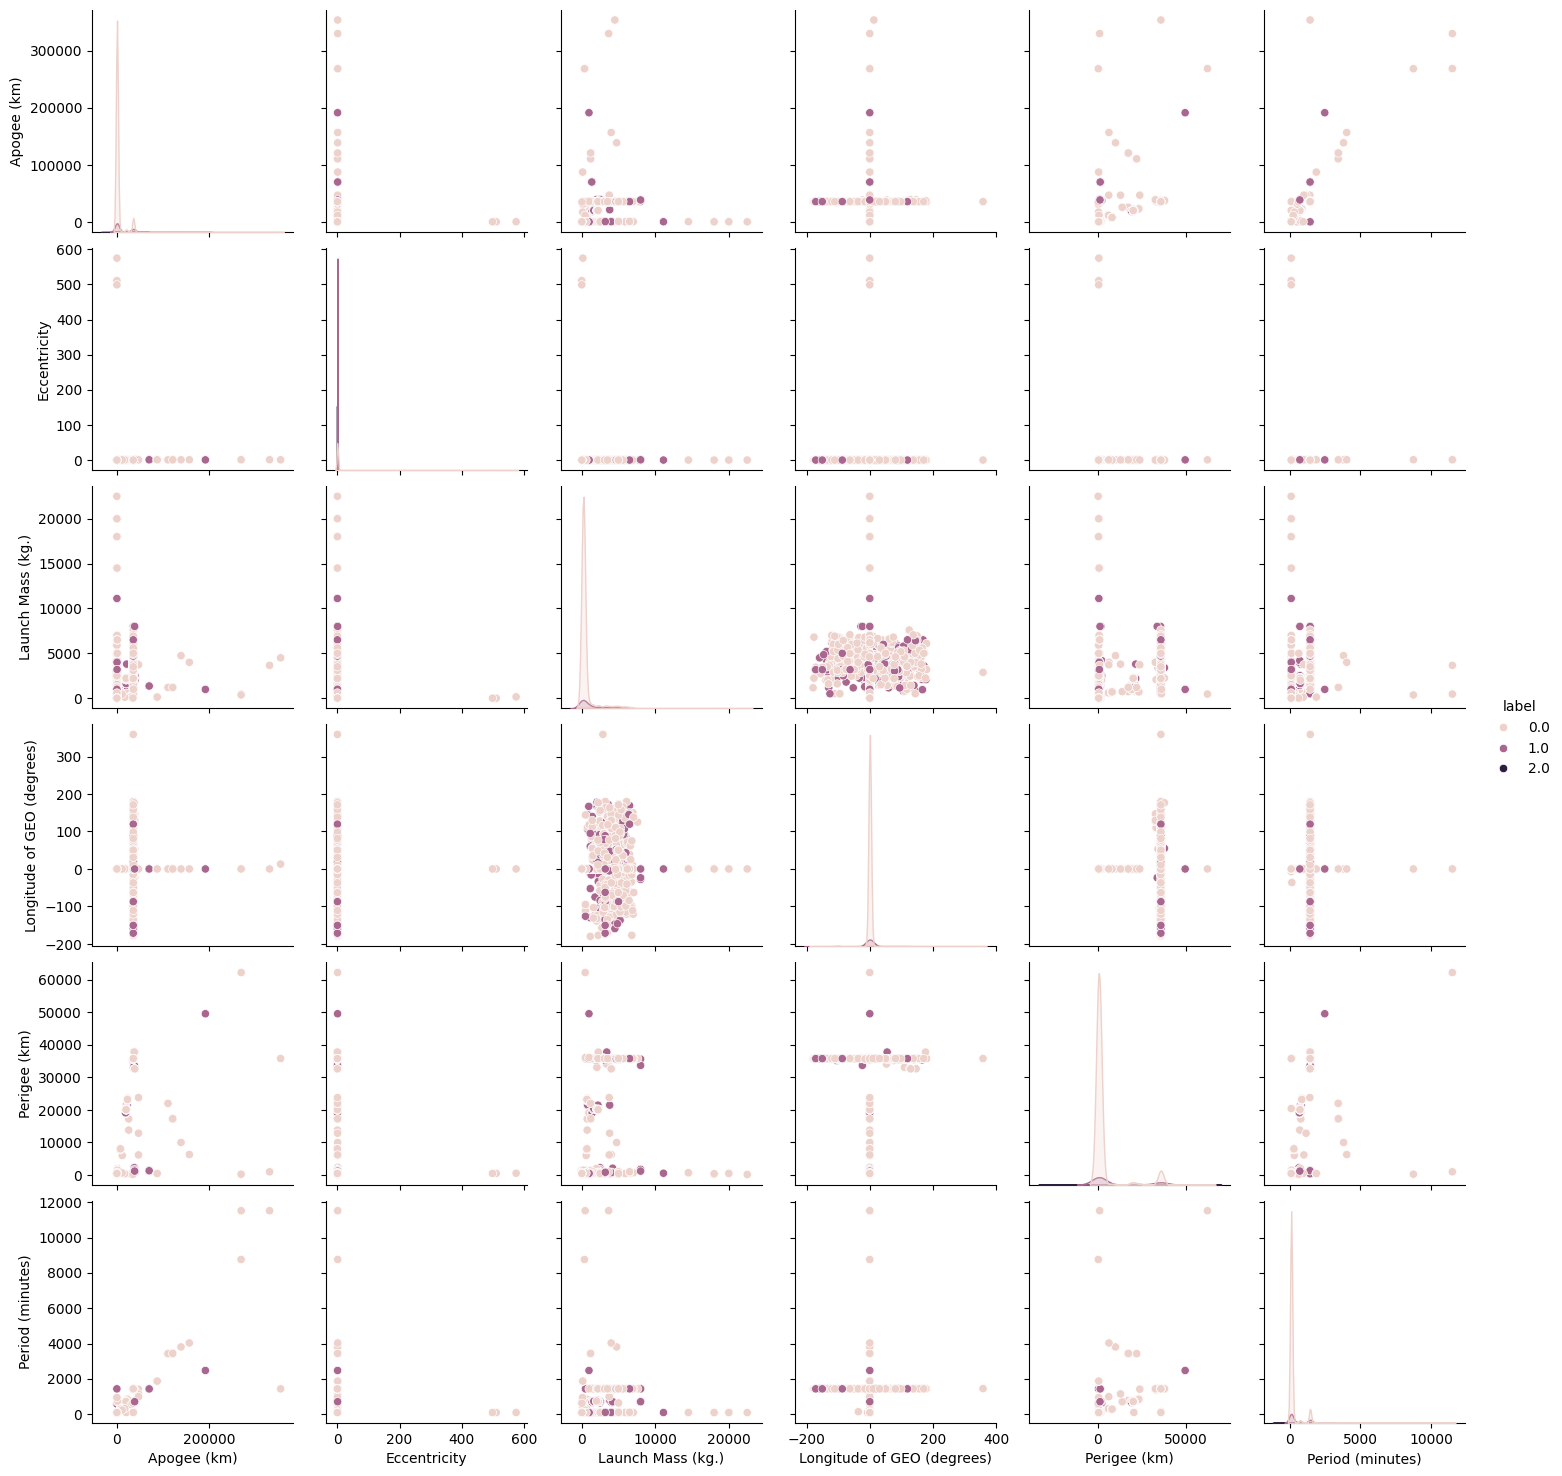

In [52]:
# importing packages
import seaborn
import matplotlib.pyplot as plt
 
seaborn.pairplot(final_scaled_features_df, hue ='label')
# to show
plt.show()

[[2.22044605e-16 6.06438328e+02 6.42125436e+02 4.51904206e-01
  9.77799216e+01 3.18757395e+02]
 [1.41896387e+01 3.16188584e+04 3.46926965e+04 3.71393243e-02
  1.31468363e+03 3.52768931e+03]
 [2.60000000e+00 2.97596000e+04 2.82483200e+05 7.72114933e-01
  7.14178600e+03 1.99280000e+03]]


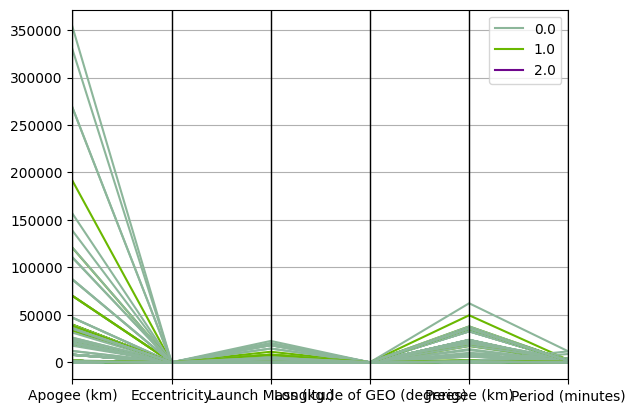

In [53]:
centroids  = kmeans.cluster_centers_
print(centroids)

# !pip install pandas
from pandas.plotting import parallel_coordinates

# Perform parallel coordinate plot
parallel_coordinates(final_scaled_features_df, 'label')
plt.show()

<Axes: >

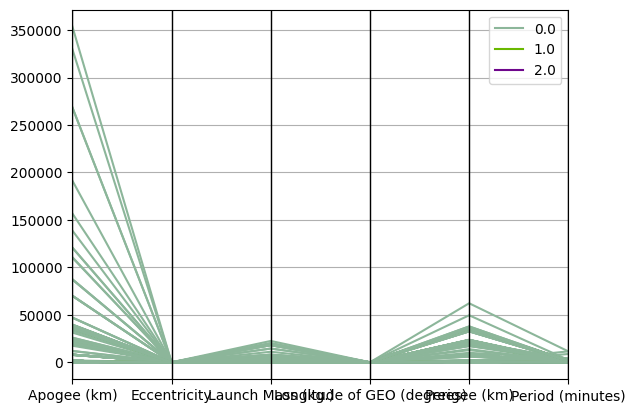

In [57]:
actual = kmeans1.predict(final_scaled_features)
expected = kmeans.predict(final_scaled_features)


actual_plot_data = get_plot_data(final_scaled_features, actual)
expected_plot_data = get_plot_data(final_scaled_features, expected)

parallel_coordinates(actual_plot_data, 'label')



# print("Difference after poisioning: ")
# for i in range(actual.size):
#     if actual[i] != expected[i]:
#         print(f"{i} : {actual[i]}, {expected[i]}")
# (actual==expected).all()

<Axes: >

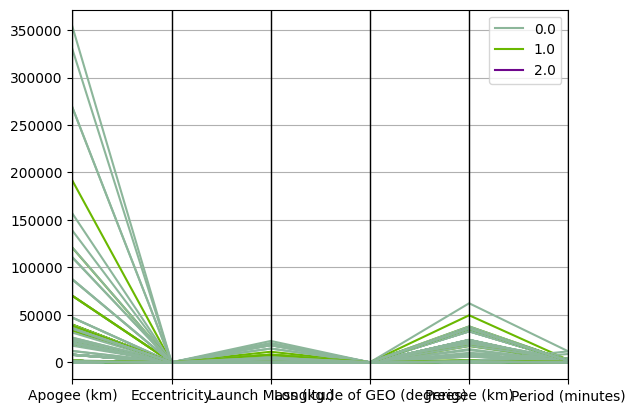

In [58]:
parallel_coordinates(expected_plot_data, 'label')

In [21]:
import matplotlib.pyplot as plt
 
#filter rows of original data
# filtered_label0 = final_scaled_features[label == 0]
 
print(label.shape, final_scaled_features.shape)
#plotting the results
plt.scatter(final_scaled_features[:, 0], final_scaled_features[:, 1], c=kmeans1.labels_, cmap='viridis')

plt.show()

(6437,) (6437, 6)


InvalidIndexError: (slice(None, None, None), 0)

In [ ]:
kmeans.inertia_

584343096389.375

In [63]:
centroids = kmeans.cluster_centers_

# np.sqrt(np.square(final_scaled_features[:]-centroids[0]).sum(axis=1))

np.sqrt(np.square(centroids[1]-centroids[0]).sum(axis=0))

46184.30349957026

In [ ]:
kmeans.n_iter_

12

In [ ]:
kmeans.labels_[:5]

array([2, 2, 2, 1, 1], dtype=int32)

In [ ]:
import joblib

joblib.dump(kmeans, "model.joblib")

['model.joblib']

In [11]:
import joblib

temp_model = joblib.load("model.joblib")
print(temp_model)
# temp_model._dir()

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)


In [12]:
dir(temp_model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_algorithm',
 '_check_feature_names',
 '_check_mkl_vcomp',
 '_check_n_features',
 '_check_params_vs_input',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_init_centroids',
 '_more_tags',
 '_n_features_out',
 '_n_init',
 '_n_threads',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_tol',
 '_transform',
 '_validate_center_shape',
 '_validate_data',
 '_validate_params',
 '_warn_mkl_vcomp',
 'algorithm',
 'cluster_

In [17]:
print(temp_model.n_features_in_)
temp_model.labels_
temp_model.get_feature_names_out

7


<bound method ClassNamePrefixFeaturesOutMixin.get_feature_names_out of KMeans(init='random', n_clusters=3, n_init=10, random_state=42)>

In [ ]:
kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,
}


 # A list holds the SSE values for each k
sse = []
for k in range(1, 15):
     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
     kmeans.fit(final_scaled_features)
     sse.append(kmeans.inertia_)

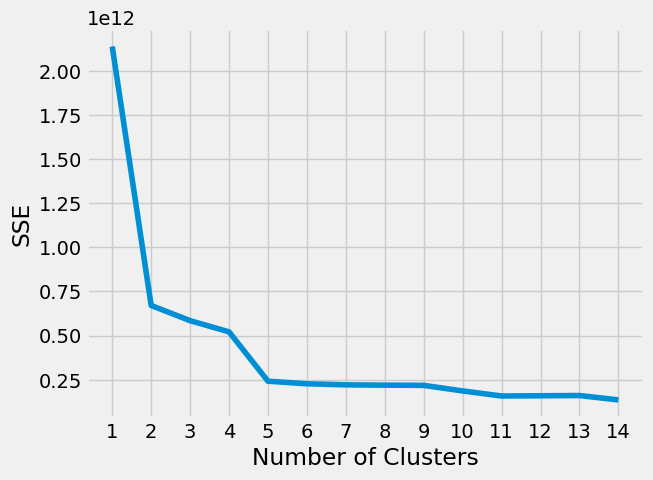

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
from kneed import KneeLocator
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)
kl.elbow

2

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(final_scaled_features)
    score = silhouette_score(final_scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

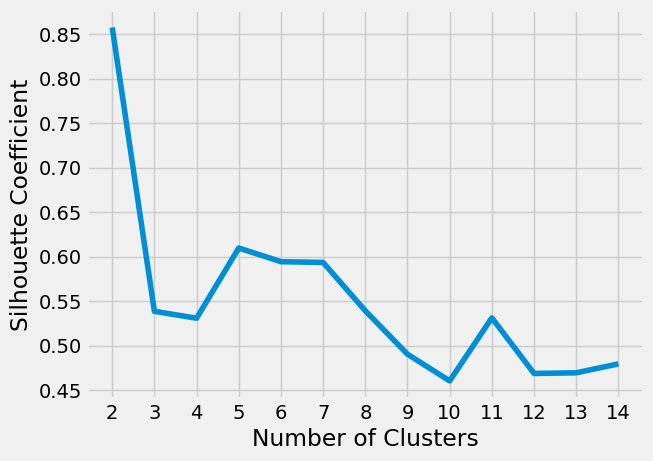

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 15), silhouette_coefficients)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [49]:
import joblib

model_under_attack = joblib.load("../model1")
# model_under_attack.(leo_df_X, leo_df_y) 

print(model_under_attack)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)


/Users/reddy/miniconda3/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/reddy/miniconda3/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [3]:
dir(model_under_attack)
pass

In [37]:
print(model_under_attack._check_feature_names)
print(model_under_attack._check_n_features)
print(model_under_attack.get_metadata_routing)

inpu = [i for i in range(3000)]
inpu2 = [i for i in range(0,3000)]
inpu2.reverse()

import numpy
print(numpy.array([inpu, inpu2]).shape)
# input feature = 3000x1
print(model_under_attack.predict([inpu, inpu2]))
print(model_under_attack.predict([inpu, inpu2]).shape)
print(model_under_attack.predict([inpu2]).shape)

<bound method BaseEstimator._check_feature_names of RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)>
<bound method BaseEstimator._check_n_features of RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)>
<bound method _MetadataRequester.get_metadata_routing of RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)>
(2, 3000)
[1 1]
(2,)
(1,)


In [50]:
import numpy as np
np.set_printoptions(threshold=np.inf)
print("Before Attack: ")
print("Top 5 features")
print(model_under_attack.feature_importances_.argsort()[-5:][::-1])



from numpy import random

x=[random.uniform(10000, size=(3000)) for i in range(200)]

# Before attack:
print(model_under_attack.predict(x))

for i in range(100):
    x[i][13] = random.uniform(1, 1000)
    x[i][20] = random.uniform(1000, 10000)
    x[i][37] = random.uniform(1000, 10000)
    x[i][92] = random.uniform(1000, 10000)
    x[i][916] = random.uniform(1000, 10000)

print("After Attack: ")
print("Top 5 features")
print(model_under_attack.feature_importances_.argsort()[-5:][::-1])
model_under_attack.fit(x[:100], [2 for i in range(100)])
model_under_attack.predict(x[100:])

Before Attack: 
[ 13  37  92 916  20]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
After Attack: 
[ 13  37  92 916  20]


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
import joblib

model_under_attack2 = joblib.load("../model11")
# model_under_attack.(leo_df_X, leo_df_y) 

print(model_under_attack2)

b'\x80\x04\x95\x8d\x00\x01\x00\x00\x00\x00\x00\x8c\x18sklearn.ensemble._forest\x94\x8c\x16RandomForestClassifier\x94\x93\x94)\x81\x94}\x94(\x8c\testimator\x94\x8c\x15sklearn.tree._classes\x94\x8c\x16DecisionTreeClassifier\x94\x93\x94)\x81\x94}\x94(\x8c\tcriterion\x94\x8c\x04gini\x94\x8c\x08splitter\x94\x8c\x04best\x94\x8c\tmax_depth\x94N\x8c\x11min_samples_split\x94K\x02\x8c\x10min_samples_leaf\x94K\x01\x8c\x18min_weight_fraction_leaf\x94G\x00\x00\x00\x00\x00\x00\x00\x00\x8c\x0cmax_features\x94N\x8c\x0emax_leaf_nodes\x94N\x8c\x0crandom_state\x94N\x8c\x15min_impurity_decrease\x94G\x00\x00\x00\x00\x00\x00\x00\x00\x8c\x0cclass_weight\x94N\x8c\tccp_alpha\x94G\x00\x00\x00\x00\x00\x00\x00\x00\x8c\x10_sklearn_version\x94\x8c\x051.3.0\x94ub\x8c\x0cn_estimators\x94Kd\x8c\x10estimator_params\x94(h\x0bh\x0fh\x10h\x11h\x12h\x13h\x14h\x16h\x15h\x18t\x94\x8c\x0ebase_estimator\x94\x8c\ndeprecated\x94\x8c\tbootstrap\x94\x88\x8c\toob_score\x94\x89\x8c\x06n_jobs\x94Nh\x15K*\x8c\x07verbose\x94K\x00\x8c\n